# Лабораториска Вежба 3 - Ненадгледувано Учење

# Mice Protein Expression Data Set
<font color="red">
Name: <strong> Dimitrija Timeski</strong></font>
<br>

<font color="orange">
Index:  <strong>203235</strong>
</font>

Data from: http://archive.ics.uci.edu/ml/datasets/Mice+Protein+Expression

# 1. Спуштете го податочното множество
Број на податоци (N) = 1080, број на атрибути (D) = 82 (77). Целта е да се
кластерираат податоците. Притоа, поради тоа што целта на лабораториската е
ненадгледувано учење, треба да ги тргнете првиот и последните 4 атрибути, и да
работите само со 77-те протеински експресии и сами да пробате да ги најдете
кластерите кои ги сугерираат класите.

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, AgglomerativeClustering, KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture

# 2. Запознавање со податочното множество и претпроцесирање.
Визуелизирајте го
податочното множество во 2 или 3 димензии користејќи PCA.

In [46]:
data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/MU/Lab_3/Data_Cortex_Nuclear.xls')
data

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,J3295_11,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,...,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823,Ts65Dn,Saline,S/C,t-SC-s
1076,J3295_12,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,...,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478,Ts65Dn,Saline,S/C,t-SC-s
1077,J3295_13,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,...,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825,Ts65Dn,Saline,S/C,t-SC-s
1078,J3295_14,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,...,0.196296,0.397676,0.335936,0.251317,0.365353,1.404031,Ts65Dn,Saline,S/C,t-SC-s


In [47]:
data.isna().sum()

MouseID      0
DYRK1A_N     3
ITSN1_N      3
BDNF_N       3
NR1_N        3
            ..
CaNA_N       0
Genotype     0
Treatment    0
Behavior     0
class        0
Length: 82, dtype: int64

In [48]:
# Remove all missing data
data.dropna(inplace=True)

In [49]:
data.columns

Index(['MouseID', 'DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N',
       'pBRAF_N', 'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N',
       'PKCA_N', 'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N',
       'pRSK_N', 'AKT_N', 'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N',
       'GSK3B_N', 'JNK_N', 'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N',
       'SOD1_N', 'MTOR_N', 'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N',
       'pNUMB_N', 'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N',
       'pGSK3B_N', 'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N',
       'RRP1_N', 'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N',
       'GluR3_N', 'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N',
       'SNCA_N', 'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N',
       'pS6_N', 'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N',
       'CaNA_N', 'Genotype', 'Treatment', 'Behavior', 'class'],
      dtype='object')

In [50]:
Y = data['class']

## Тргање на првиот и последните 4 атрибути

In [51]:
data.drop(['MouseID','Genotype', 'Treatment', 'Behavior' , 'class'], inplace=True, axis=1)

In [52]:
data.columns

Index(['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N', 'pBRAF_N',
       'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N', 'PKCA_N',
       'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N', 'pRSK_N', 'AKT_N',
       'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N', 'GSK3B_N', 'JNK_N',
       'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N', 'SOD1_N', 'MTOR_N',
       'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N', 'pNUMB_N',
       'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N', 'pGSK3B_N',
       'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N', 'RRP1_N',
       'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N', 'GluR3_N',
       'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N', 'SNCA_N',
       'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N', 'pS6_N',
       'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N', 'CaNA_N'],
      dtype='object')

In [53]:
Y

75      c-CS-m
76      c-CS-m
77      c-CS-m
78      c-CS-m
79      c-CS-m
         ...  
1045    t-SC-s
1046    t-SC-s
1047    t-SC-s
1048    t-SC-s
1049    t-SC-s
Name: class, Length: 552, dtype: object

In [54]:
scaled_data = StandardScaler().fit_transform(data)

In [55]:
scaled_data

array([[ 1.43670714,  1.12612827,  1.70538327, ..., -0.88379591,
        -1.10934869,  0.76435059],
       [ 1.23272374,  1.19886098,  1.38110357, ..., -0.48484616,
        -1.06091877,  0.564395  ],
       [ 1.36101446,  1.25861003,  1.60590551, ..., -0.49989147,
        -1.12337285,  0.59441758],
       ...,
       [-0.43822922, -0.33177247,  0.8679738 , ...,  0.11519958,
         1.09360731, -0.84145241],
       [-0.42047396, -0.39246637,  1.41431154, ...,  0.59325937,
         1.66857713, -0.74286123],
       [-0.30217087, -0.38482837,  1.33778207, ...,  1.16290415,
         1.06721069, -0.89943512]])

In [56]:
print("Број на класи = ", len(Y.value_counts()))

Број на класи =  8


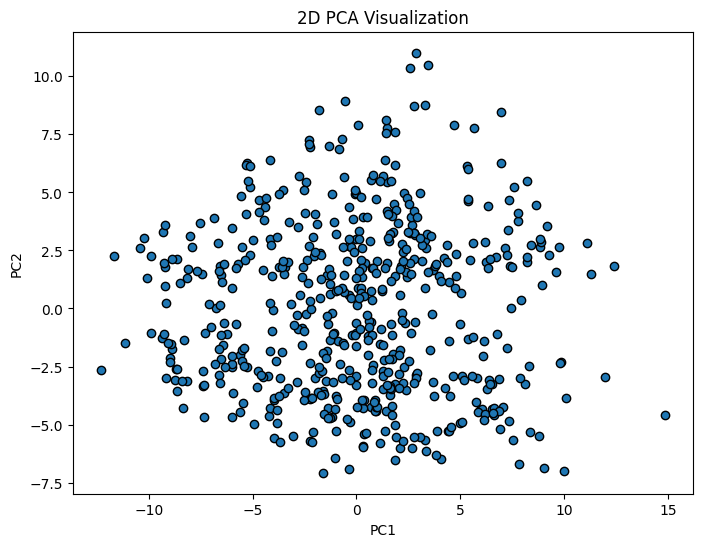

In [57]:
# 2D Визуелизација
pca = PCA(n_components=3)
components = pca.fit_transform(scaled_data)

plt.figure(figsize=(8, 6))
plt.scatter(components[:, 0], components[:, 1], edgecolor='k')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('2D PCA Visualization')
plt.show()

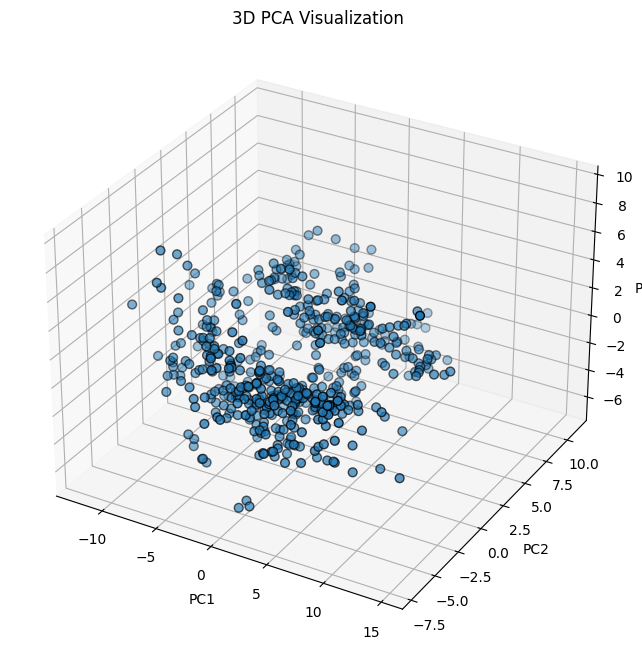

In [58]:
# 3D Визуелизација
fig = plt.figure(figsize=(10, 8))
plot = fig.add_subplot(111, projection='3d')

plot.scatter(components[:, 0], components[:, 1], components[:, 2], edgecolor='k', s=40)
plot.set_xlabel('PC1')
plot.set_ylabel('PC2')
plot.set_zlabel('PC3')
plot.set_title('3D PCA Visualization')
plt.show()

# 3. Кластерирање.
Искористете 2 од методите за кластерирање кои ги имаме учено и видете кои се
резултатите кои се добиваат. Дали резултатите се слични?

a) Gaussian Mixture Models

b) K-Means

c) Hierarchical Clustering

d) DBSCAN

# Визуелизација на резултатите.
Визуелизирајте ги резултатите во 2 или 3 димензии со една боја на секој кластер,
повторно користејќи некој од методите како PCA или t-SNE. (t-SNE е
препорачливо). 

In [59]:
k_values = range(1, 11)
inertias = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmeans.fit(scaled_data)
    inertias.append(kmeans.inertia_)

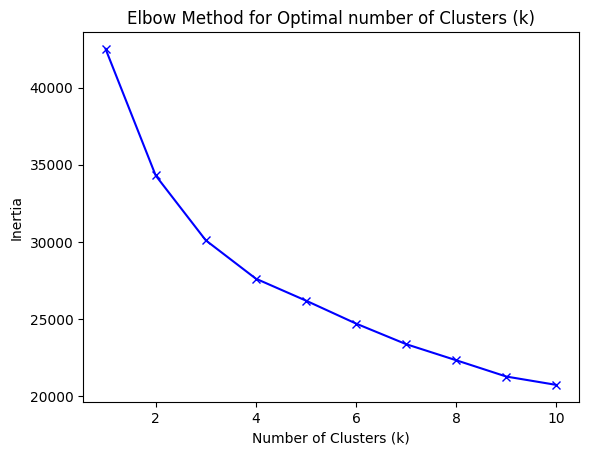

In [60]:
plt.plot(k_values, inertias, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal number of Clusters (k)')
plt.show()

t-SNE (t-Distributed Stochastic Neighbor Embedding): 3 димензии

Број на компоненти: 4

## a) Gaussian Mixture Model

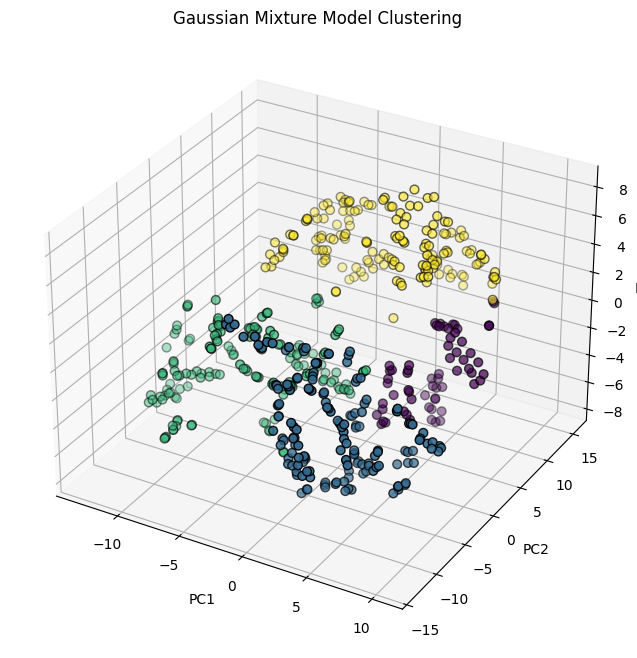

In [70]:
gmm = GaussianMixture(n_components=4).fit(X_tsne)
predictions = gmm.predict(X_tsne)

fig = plt.figure(figsize=(10, 8))
plot = fig.add_subplot(111, projection='3d')

plot.scatter(
    X_tsne[:, 0],
    X_tsne[:, 1],
    X_tsne[:, 2],
    c=predictions,
    edgecolor='k',
    s=40,
    cmap='viridis'
)

plot.set_xlabel('PC1')
plot.set_ylabel('PC2')
plot.set_zlabel('PC3')
plot.set_title('Gaussian Mixture Model Clustering')

plt.show()

## b) K-Means


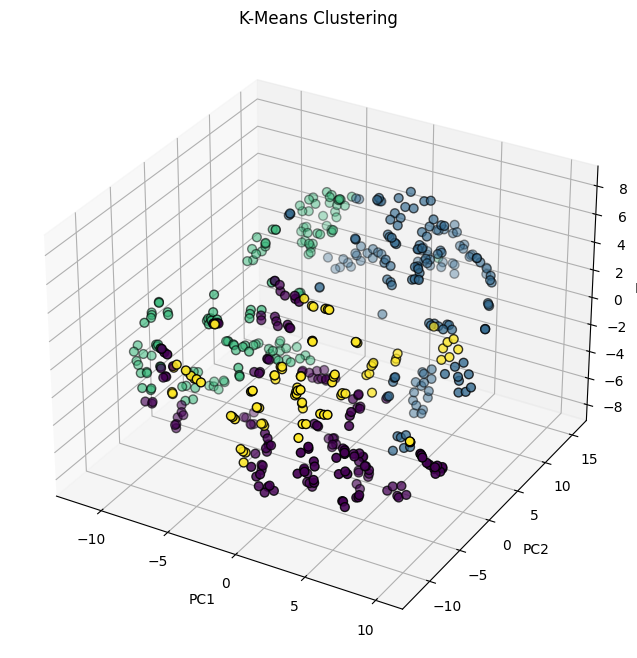

In [71]:
kmeans = KMeans(n_clusters=4, n_init='auto').fit(scaled_data) # 4 components
predictions = kmeans.predict(scaled_data)

tsne = TSNE(n_components=3) # Намалување на димензионалност
X_tsne = tsne.fit_transform(scaled_data)

fig = plt.figure(figsize=(10, 8))
plot = fig.add_subplot(111, projection='3d')

plot.scatter(
    X_tsne[:, 0],
    X_tsne[:, 1],
    X_tsne[:, 2],
    c=predictions,
    edgecolor='k',
    s=40,
    cmap='viridis'
)

plot.set_xlabel('PC1')
plot.set_ylabel('PC2')
plot.set_zlabel('PC3')
plot.set_title('K-Means Clustering')

plt.show()

Note: Одлучив да направам за сите 4.

## c) Hierarchical Clustering

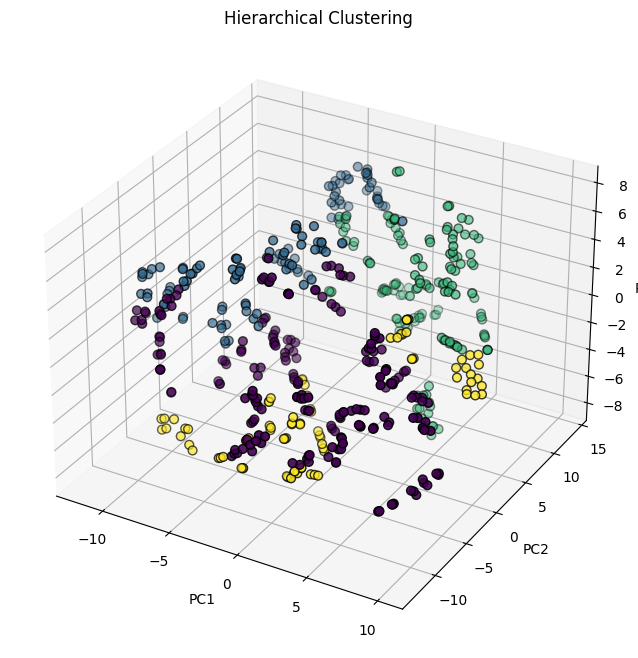

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.manifold import TSNE

hierarchical = AgglomerativeClustering(n_clusters=4) # 4 components
predictions = hierarchical.fit_predict(scaled_data)


tsne = TSNE(n_components=3) # Намалување на димензионалност
X_tsne = tsne.fit_transform(scaled_data)

fig = plt.figure(figsize=(10, 8))
plot = fig.add_subplot(111, projection='3d')

plot.scatter(
    X_tsne[:, 0],
    X_tsne[:, 1],
    X_tsne[:, 2],
    c=predictions,
    edgecolor='k',
    s=40,
    cmap='viridis'
)

plot.set_xlabel('PC1')
plot.set_ylabel('PC2')
plot.set_zlabel('PC3')
plot.set_title('Hierarchical Clustering')

plt.show()


## d) DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

Кај DBSCAN не специфицираме број на компоненти.

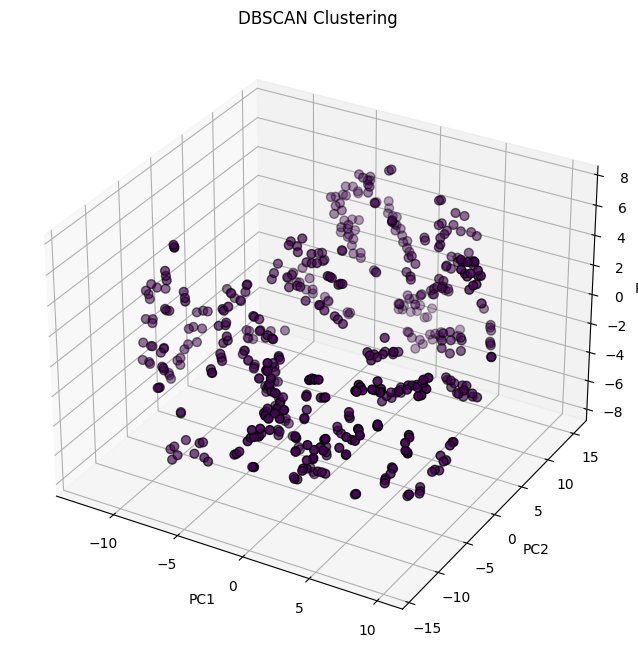

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE

dbscan = DBSCAN()
predictions = dbscan.fit_predict(scaled_data) # /

tsne = TSNE(n_components=3) # Намалување на димензионалност
X_tsne = tsne.fit_transform(scaled_data)

fig = plt.figure(figsize=(10, 8))
plot = fig.add_subplot(111, projection='3d')

plot.scatter(
    X_tsne[:, 0],
    X_tsne[:, 1],
    X_tsne[:, 2],
    c=predictions,
    edgecolor='k',
    s=40,
    cmap='viridis'
)

plot.set_xlabel('PC1')
plot.set_ylabel('PC2')
plot.set_zlabel('PC3')
plot.set_title('DBSCAN Clustering')

plt.show()
